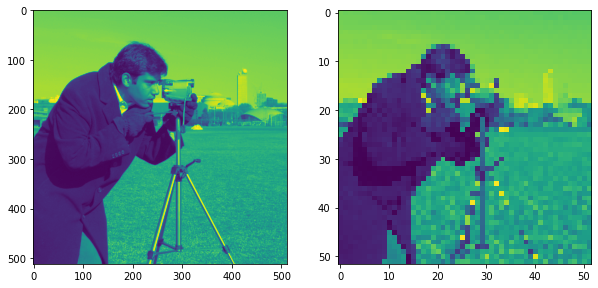

In [1]:
from skimage import data
import matplotlib.pyplot as plt

image = data.camera()
pixelated = image[::10,::10]
fig,(ax0,ax1) =plt.subplots(1,2,figsize=(10,5))
ax0.imshow(image)
ax1.imshow(pixelated)

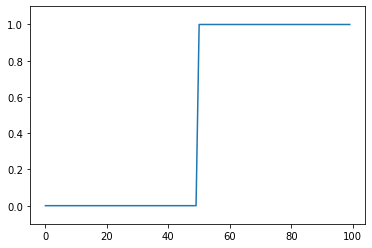

In [2]:
import numpy as np
step_signal = np.zeros(100)
step_signal[50:] =1
fig,ax=plt.subplots()
ax.plot(step_signal)
ax.margins(y=0.1)

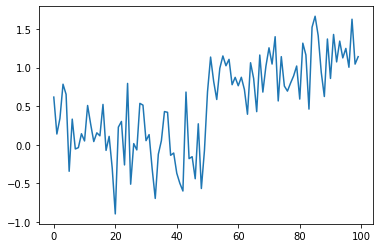

In [3]:
#step_signal adding normal noise to the step signal
np.random.seed(0)
noisy_signal = (step_signal+np.random.normal(0,0.35,step_signal.shape))
ax.plot(noisy_signal)
fig,ax=plt.subplots()
ax.plot(noisy_signal)

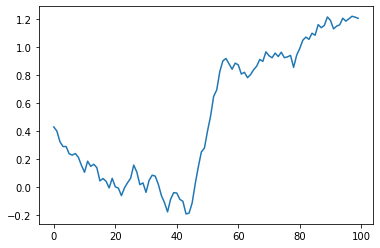

In [4]:
from scipy import ndimage as ndi
mean_kernel111 = np.full((11,),1/11)
smooth_signal_ref = ndi.convolve(noisy_signal,mean_kernel111,mode='reflect')
fig,ax=plt.subplots()
ax.plot(smooth_signal_ref)

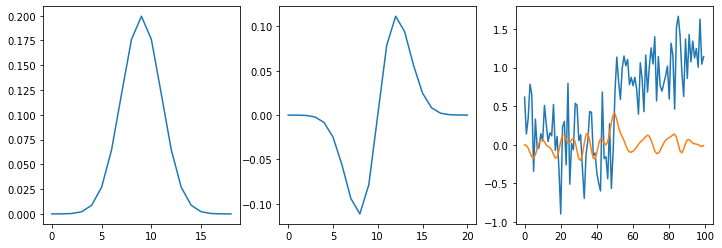

In [5]:
xi = np.arange(19)
x0= 19//2
x= xi-x0
sigma = 2
kernel =(
        (1/(np.sqrt(np.pi*2*sigma**2)))
            * np.exp(-x**2 / (2*sigma**2))
        )
diff_kernel = np.convolve(kernel,[-1,0,1])
fig,(ax0,ax1,ax2) =plt.subplots(1,3,figsize=(12,4))
ax0.plot(kernel)
ax1.plot(diff_kernel)
ax2.plot(noisy_signal)
ax2.plot(ndi.correlate(noisy_signal,diff_kernel))

In [6]:
kernel

array([7.99187055e-06, 6.69151129e-05, 4.36341348e-04, 2.21592421e-03,
       8.76415025e-03, 2.69954833e-02, 6.47587978e-02, 1.20985362e-01,
       1.76032663e-01, 1.99471140e-01, 1.76032663e-01, 1.20985362e-01,
       6.47587978e-02, 2.69954833e-02, 8.76415025e-03, 2.21592421e-03,
       4.36341348e-04, 6.69151129e-05, 7.99187055e-06])

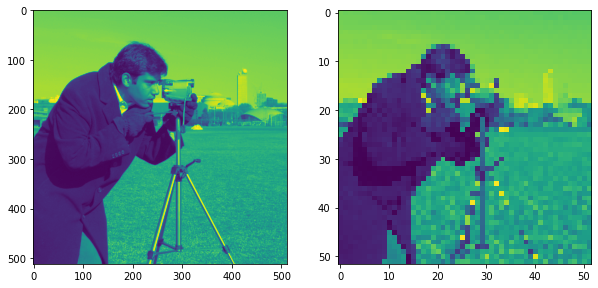

In [7]:
from skimage import data
import matplotlib.pyplot as plt

image = data.camera()
pixelated = image[::10,::10]
mean_kernel = np.full((3,3),1/9)
fig,(ax0,ax1) =plt.subplots(1,2,figsize=(10,5))
ax0.imshow(image)
ax1.imshow(pixelated)

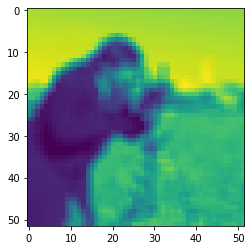

In [8]:
from pylab import *
filtered = ndi.correlate(pixelated,mean_kernel)
imshow(filtered)

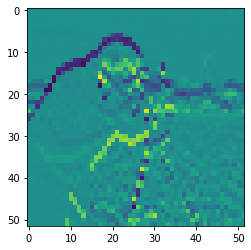

In [9]:
vertical_kernel = np.array([
    [-1],
    [0],
    [1],
    
])
gradient_vertical = ndi.correlate(pixelated.astype(float),vertical_kernel)
horizontal = gradient_vertical.T
fig,ax=plt.subplots()
ax.imshow(gradient_vertical);

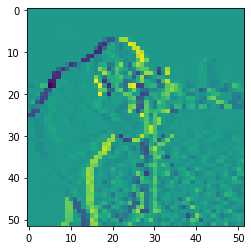

In [10]:
vertical_kernel = np.array([
    [-1],
    [0],
    [1],
    
])
horizontal =vertical_kernel.T
gradient_vertical = ndi.correlate(pixelated.astype(float),vertical_kernel)
gradient_horizontal = ndi.correlate(pixelated.astype(float),horizontal)
fig,ax=plt.subplots()
ax.imshow(gradient_horizontal );

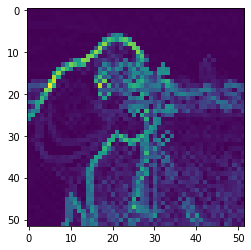

In [11]:
## Combining vertical and Horizontal kernel

com = np.sqrt(gradient_vertical**2 + gradient_horizontal**2)
fig,ax=plt.subplots()
ax.imshow(com);

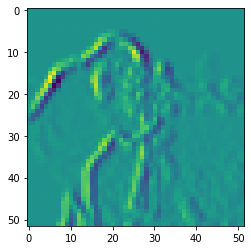

In [12]:
com = np.sqrt(gradient_vertical**2 + gradient_horizontal**2)
com = ndi.sobel(com)
fig,ax=plt.subplots()
ax.imshow(com);

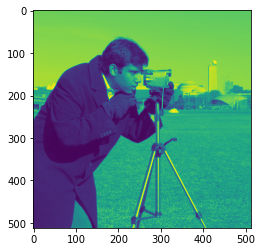

In [26]:
fig,ax=plt.subplots()
ax.imshow(image);

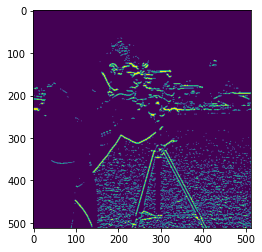

In [25]:
from skimage import filters
target = (filters.sobel_h(image)>0.07)
fig,ax=plt.subplots()
ax.imshow(target);

In [28]:
## Segmentation of Region of in interest

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%gui qt


In [29]:
import time
time.sleep(5)

In [47]:
import numpy as np
from scipy import ndimage as ndi
import napari

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Generate initiali image with overlapping circles
x,y = np.indices((80,80))
x1,y1,x2,y2 = 28, 28, 44, 52
r1,r2 = 16,20
mask_circle1 = (x-x1)**2 + (y-y1)**2 < r1**2
mask_circle2 = (x-x2)**2 + (y-y2)**2 < r2**2
image = np.logical_or(mask_circle1,mask_circle2)
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance,footprint = np.ones((3,3)),labels=image)
mask = np.zeros(distance.shape,dtype=bool)
mask[tuple(coords.T)] = True
markers, _ =ndi.label(mask)
labels = watershed(-distance,markers,mask=image)
print(labels)
#viewer = napari.Viewer()
"""
image_layer = viwer.addd_image(image)
labels_layer = viewer.add_labels(labels)
labels_as_image_layer = viewer.add_image(labels,name='Labels as Image')
"""

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


"\nimage_layer = viwer.addd_image(image)\nlabels_layer = viewer.add_labels(labels)\nlabels_as_image_layer = viewer.add_image(labels,name='Labels as Image')\n"

In [49]:
import napari

# create a Viewer and add an image here
viewer = napari.view_image(target)

# custom code to add data here
viewer.add_points(my_points_data)

# start the event loop and show the viewer
napari.run()

/Users/anushrimore/opt/anaconda3/lib/python3.8/site-packages/napari/_qt/__init__.py:54: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


AttributeError: type object 'SubControl' has no attribute 'SC_None'

In [54]:
import napari
from skimage import data
viewer = napari.view_image(data.moon())

/Users/anushrimore/opt/anaconda3/lib/python3.8/site-packages/napari/_qt/__init__.py:54: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


AttributeError: type object 'SubControl' has no attribute 'SC_None'

In [55]:
import napari
from skimage.data import cells3d

cells = cells3d()[30, 1]  # get some data
viewer = napari.view_image(cells, colormap='magma')

/Users/anushrimore/opt/anaconda3/lib/python3.8/site-packages/napari/_qt/__init__.py:54: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)


AttributeError: type object 'SubControl' has no attribute 'SC_None'